In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import zipfile

# Path to your ZIP file and the output CSV
zip_path = '/content/drive/MyDrive/Capstone/Project.zip'


# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Project')

# Walk through the extracted folders and create the CSV data
data = []
root_path = 'Project'
for dirpath, dirnames, filenames in os.walk(root_path):
    for file in filenames:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            label = os.path.basename(dirpath)
            image_path = os.path.join(dirpath, file)
            data.append([image_path, label])

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data, columns=['Image_path', 'Label'])


In [16]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['Label'].value_counts().reset_index()
df_counts.columns = ['Rice', 'Counts']

# Using a categorical color scale for the plants
fig = px.bar(df_counts,
             x='Rice',
             y='Counts',
             title='Value Counts for each type of rice',
             labels={'Type of Rice': 'Rice', 'Counts': 'Counts'},
             color='Rice',
             category_orders={"Rice": df_counts['Rice'].tolist()})

# Update the color scale
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))

# Show the plot
fig.show()

In [5]:
import tensorflow as tf

In [8]:
import matplotlib.pyplot as plt

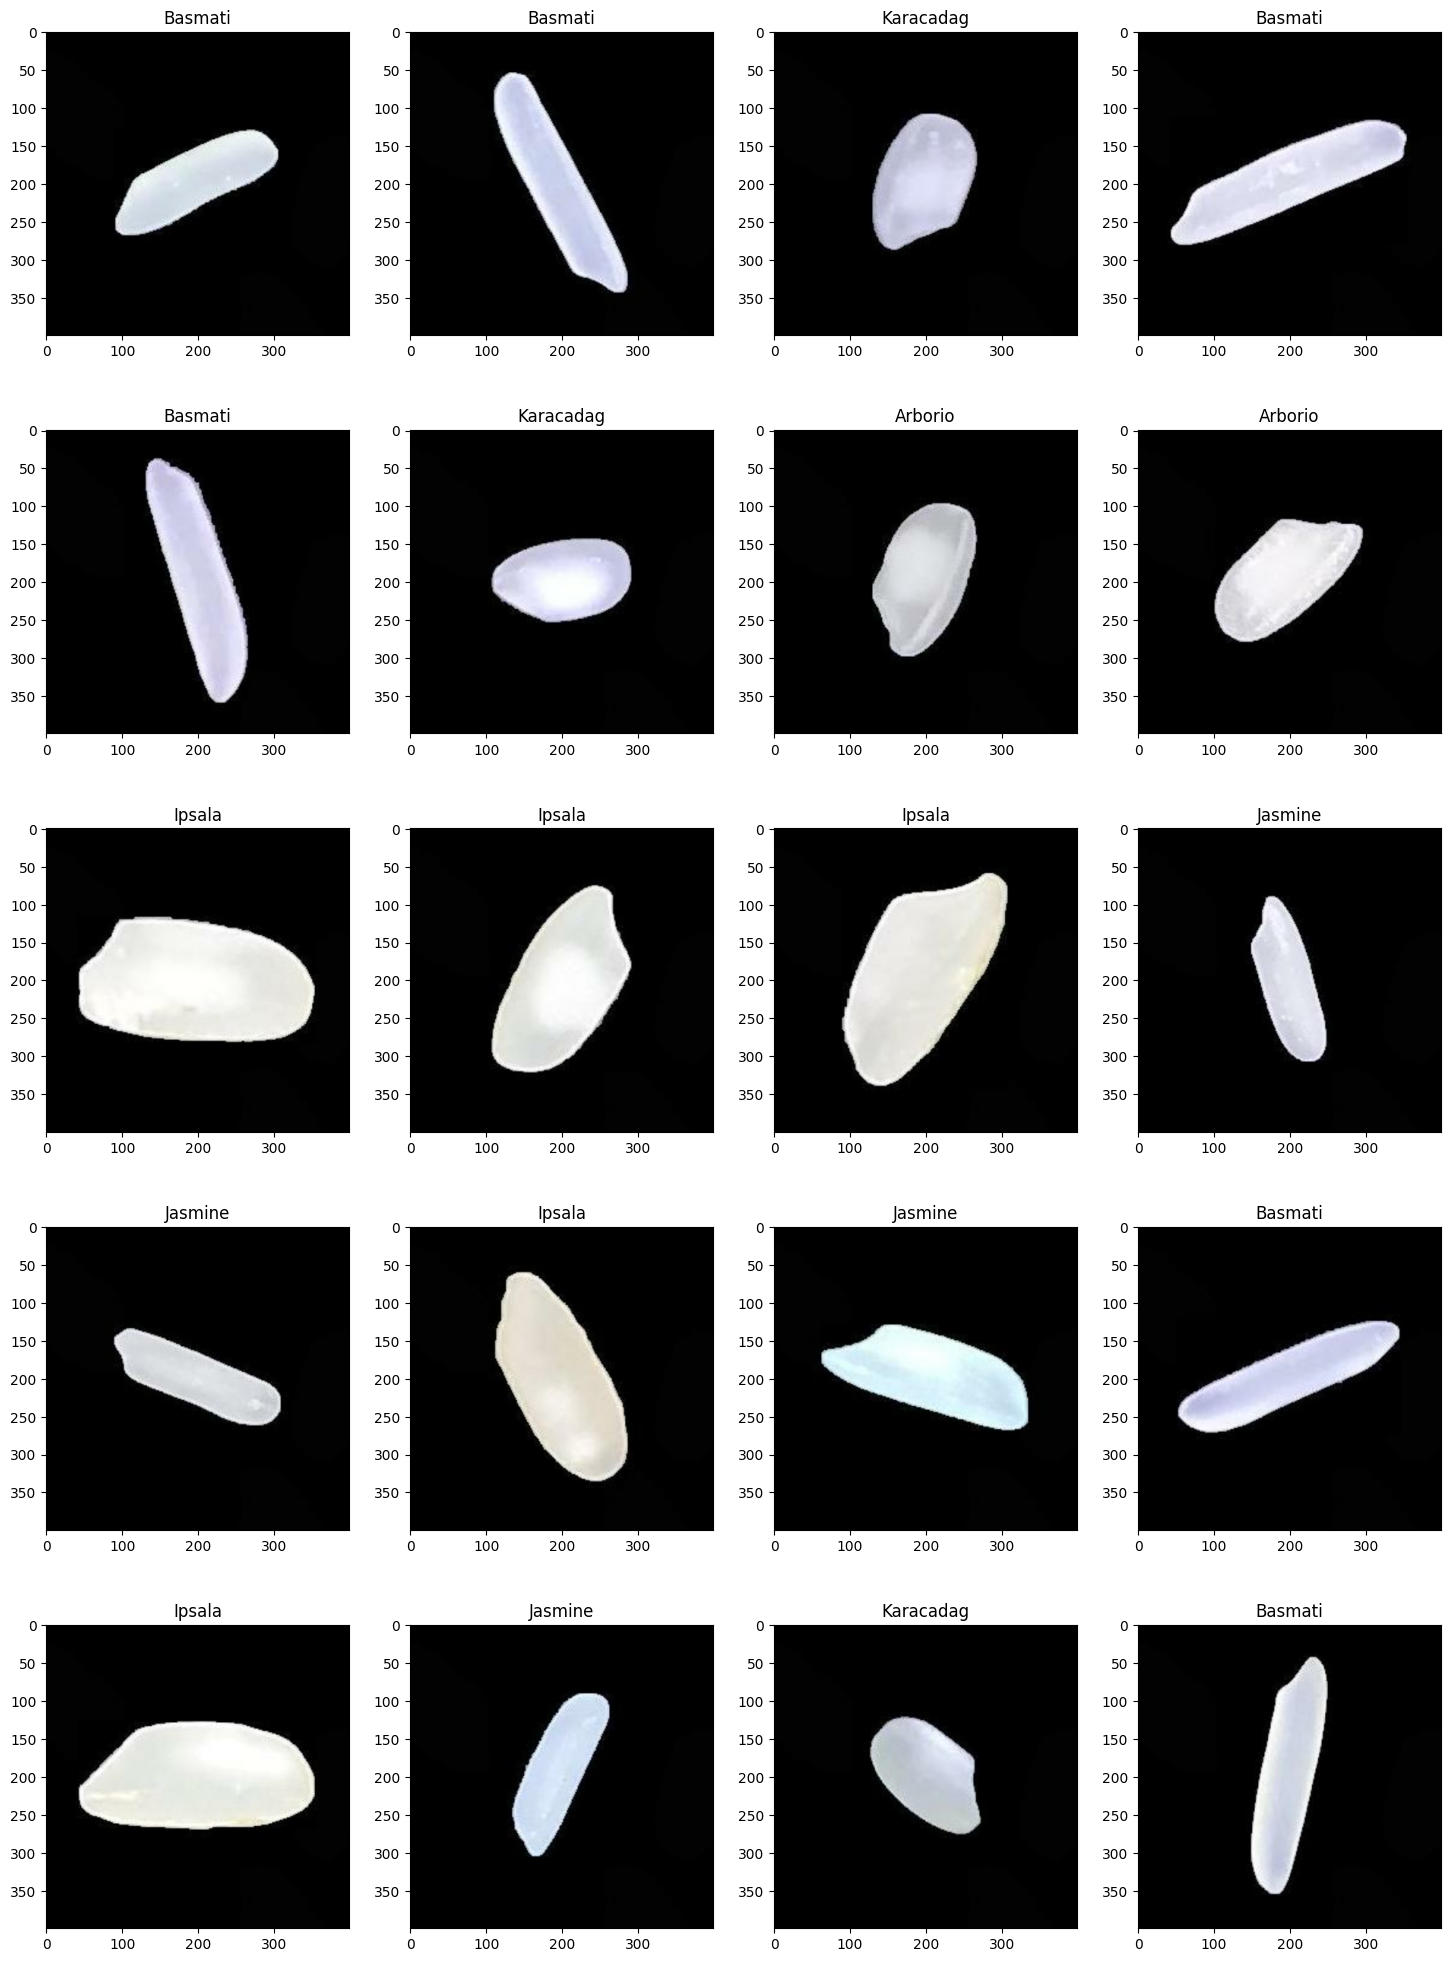

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,25))

# Randomly sample 20 rows from the dataframe
random_samples = df.sample(20)

for i, (index, row) in enumerate(random_samples.iterrows()):
    plt.subplot(5, 4, i + 1)

    image = tf.io.read_file(row['Image_path'])
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [400, 400])

    plt.imshow(image)
    plt.title(row['Label'])

plt.show()